# Pandas Objects

At the very basic level, Pandas objects can be thought of as enhanced versions of
NumPy structured arrays in which the rows and columns are identified with labels
rather than simple integer indices. Let’s introduce the three
fundamental Pandas data structures: the Series, DataFrame, and Index.

# Series

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Pandas Seres Object

A Series object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).

In [3]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

We can access both, values and the sequence of indices in the Series:

In [5]:
s.values

array([ 2, -1,  3,  5], dtype=int64)

In [6]:
s.index

RangeIndex(start=0, stop=4, step=1)

Data can be accessed by the asocciated index:

In [7]:
s[1]

-1

In [8]:
s[1:3]

1   -1
2    3
dtype: int64

Series objects behave much like one-dimensional NumPy ndarrays, and you can often pass them as parameters to NumPy functions:

In [10]:
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [12]:
s + 10

0    12
1     9
2    13
3    15
dtype: int64

In [13]:
s + [10, 2, 3, 1]

0    12
1     1
2     6
3     6
dtype: int64

In [15]:
s < 4

0     True
1     True
2     True
3    False
dtype: bool

## Index Labels

The essential difference with a NumPy array is the presence
of the index: while the NumPy array has an implicitly defined integer index used
to access the values, the Pandas Series has an explicitly defined index associated with
the values.

In [24]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [25]:
data['b']

0.5

We can still accessing the index by integer location:

In [26]:
data[2]

0.75

We can even use noncontiguous or nonsequential indices:

In [27]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

 - iloc: integer location
 - loc: label location

In [28]:
data.iloc[0]

0.25

In [30]:
try:
    data.loc[0]
except KeyError as e:
    print('Key Error: ', e)

Key Error:  0


### Series as specialized dictionary
In this way, you can think of a Pandas Series a bit like a specialization of a Python
dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary
values, and a Series is a structure that maps typed keys to a set of typed values. This
typing is important: just as the type-specific compiled code behind a NumPy array
makes it more efficient than a Python list for certain operations, the type information
of a Pandas Series makes it much more efficient than Python dictionaries for certain
operations.

We can make the Series-as-dictionary analogy even more clear by constructing a
Series object directly from a Python dictionary:

In [35]:
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict, name='population')
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [36]:
population['Texas': 'Florida']

Texas       26448193
New York    19651127
Florida     19552860
Name: population, dtype: int64

Notice that in this case, the Series is populated only with the explicitly identified
keys.

In [37]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

### Automatic Alignment

In [38]:
s1 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s1

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [39]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s2 = pd.Series(weights)
s2

alice     68
bob       83
colin     86
darwin    68
dtype: int64

When an operation involves multiple Series objects, pandas automatically aligns items by matching index labels.

In [40]:
s1 + s2

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64



The resulting Series contains the union of index labels from s2 and s3. Since "colin" is missing from s2 and "charles" is missing from s3, these items have a NaN result value. (ie. Not-a-Number means missing).

## Plotting a Series

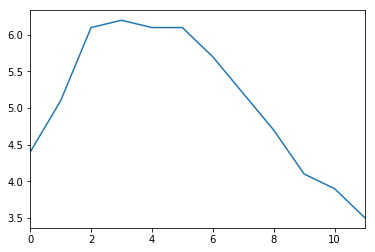

In [43]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
temp_s = pd.Series(temperatures, name="Temperature")
temp_s.plot();

# The Pandas DataFrame Object

A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see DataFrames as dictionaries of Series.

In [44]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
            'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

In [45]:
states = pd.DataFrame({'population': population,
                        'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [49]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [50]:
states.columns

Index(['population', 'area'], dtype='object')

In [51]:
states.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]], dtype=int64)



Another convenient way to create a DataFrame is to pass all the values to the constructor as an ndarray, or a list of lists, and specify the column names and row index labels separately:


In [52]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112




It is also possible to create a DataFrame with a dictionary (or list) of dictionaries (or list):


In [55]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Data Selection in DataFrames

In [56]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [57]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [58]:
states.population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

This dictionary-style syntax can also be
used to modify the object, in this case to add a new column:

In [62]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [63]:
states.T

,California,Texas,New York,Florida,Illinois
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [65]:
states.loc['California', 'population']

38332521

In [66]:
states.iloc[0, 0]

38332521

We can also use masking (conditional selection):

In [72]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [73]:
states.loc[states.density > 100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


### Handling Missing Data

#### Detecting Null Values

In [30]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [31]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [32]:
data[data.notnull()]

0        1
2    hello
dtype: object

#### Dropping Null Values

In [33]:
data.dropna()

0        1
2    hello
dtype: object

In [35]:
df = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full
columns. Depending on the application, you might want one or the other, so
dropna() gives a number of options for a DataFrame.

In [38]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [39]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [42]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [44]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [45]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [46]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [48]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [49]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [50]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [51]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [54]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Aggregation and Grouping

In [55]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [56]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple Aggregation

In [61]:
print("""Planets Mass:
    sum: {}
    mean: {}
    std: {}
""".format(
    planets['mass'].sum(),
    planets['mass'].mean(),
    planets['mass'].std()
))


Planets Mass:
    sum: 1353.37638
    mean: 2.6381605847953233
    std: 3.8186166509616046



In [62]:
planets.sum()

method            Radial VelocityRadial VelocityRadial VelocityR...
number                                                         1848
orbital_period                                          1.98689e+06
mass                                                        1353.38
distance                                                     213368
year                                                        2079388
dtype: object

In [63]:
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [64]:
planets.std()

number                1.240976
orbital_period    26014.728304
mass                  3.818617
distance            733.116493
year                  3.972567
dtype: float64

In [65]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [66]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### Groupby: Split, Apply, Combine

<img src='images/split-apply-combine.png'>

In [67]:
planets.groupby('method')

In [68]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [69]:
planets.groupby('method').mean()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.000000,631.180000,NaN,17.875000,2011.500000
Eclipse Timing Variations,1.666667,4751.644444,5.125000,315.360000,2010.000000
Imaging,1.315789,118247.737500,NaN,67.715937,2009.131579
Microlensing,1.173913,3153.571429,NaN,4144.000000,2009.782609
Orbital Brightness Modulation,1.666667,0.709307,NaN,1180.000000,2011.666667
Pulsar Timing,2.200000,7343.021201,NaN,1200.000000,1998.400000
Pulsation Timing Variations,1.000000,1170.000000,NaN,NaN,2007.000000
Radial Velocity,1.721519,823.354680,2.630699,51.600208,2007.518987
Transit,1.954660,21.102073,1.470000,599.298080,2011.236776


In [75]:
planets.groupby('year')['method'].apply(pd.Series.mode)

year   
1989  0    Radial Velocity
1992  0      Pulsar Timing
1994  0      Pulsar Timing
1995  0    Radial Velocity
1996  0    Radial Velocity
1997  0    Radial Velocity
1998  0    Radial Velocity
1999  0    Radial Velocity
2000  0    Radial Velocity
2001  0    Radial Velocity
2002  0    Radial Velocity
2003  0    Radial Velocity
2004  0    Radial Velocity
2005  0    Radial Velocity
2006  0    Radial Velocity
2007  0    Radial Velocity
2008  0    Radial Velocity
2009  0    Radial Velocity
2010  0            Transit
2011  0    Radial Velocity
2012  0            Transit
2013  0            Transit
2014  0            Transit
Name: method, dtype: object

In [77]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Pivot Tables

We have seen how the GroupBy abstraction lets us explore relationships within a dataset.
A pivot table is a similar operation that is commonly seen in spreadsheets and
other programs that operate on tabular data. The pivot table takes simple columnwise
data as input, and groups the entries into a two-dimensional table that provides
a multidimensional summarization of the data. The difference between pivot tables
and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as
essentially a multidimensional version of GroupBy aggregation. That is, you splitapply-
combine, but both the split and the combine happen across not a onedimensional
index, but across a two-dimensional grid.

In [81]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


```
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                        aggfunc='mean', fill_value=None, margins=False,
                        dropna=True, margins_name='All')```

In [85]:
titanic.pivot_table(index='sex', columns='class',
                        aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [87]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Tidy Data:
https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en